<font face="B Mitra" size=4>
<div dir=rtl align=center>
<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">
<br>
<font size=6>
<b>پروژه سوم هوش مصنوعی</b>
<br>
<font size=5> استاد درس: دکتر مهدی قطعی و آقای بهنام یوسفی‌مهر
<br>
<font size=5> طراحان پروژه: ایلیا اسدی ، محمدرضا شیخ الاسلامی ، سینا نگهبان ، آرین جعفری
<br>
<font size=4> پاییز ۱۴۰۴
<hr>
</div>
</font>

### Loading Libraries

In [1]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


warnings.filterwarnings('ignore')
%matplotlib inline

### Loading Data from kaggle

In [2]:


od.download(
    "https://www.kaggle.com/datasets/priyamchoksi/100000-diabetes-clinical-dataset/data")

Skipping, found downloaded files in ".\100000-diabetes-clinical-dataset" (use force=True to force download)


## EDA

#### Dataset Overview

##### 🩺 Comprehensive Diabetes Clinical Dataset (100k Rows)

This dataset contains **clinical and demographic information** of patients related to **diabetes**.  
The main objective of this dataset is to **predict the likelihood of diabetes** based on various clinical and lifestyle factors such as blood pressure, glucose level, smoking history, and more.

---

##### 📊 Feature Description

| Feature | Description |
|----------|-------------|
| **Gender** | The patient’s gender, usually either *Male* or *Female*. |
| **Age** | The age of the patient in years. |
| **Location** | The geographical location of the patient (e.g., city, state, or region). |
| **Race** | The race or ethnicity of the patient, such as *Caucasian*, *African American*, *Asian*, etc. |
| **Hypertension** | Indicates whether the patient has hypertension (**1 = Yes**, **0 = No**). |
| **Heart Disease** | Indicates whether the patient has heart disease (**1 = Yes**, **0 = No**). |
| **Smoking History** | The patient’s smoking history. Common values include *never*, *former*, *current*, etc. |
| **BMI** | Body Mass Index (BMI), calculated from the patient’s weight and height. |
| **HbA1c Level** | The HbA1c value, representing the average blood sugar level over the past 2–3 months. |
| **Blood Glucose Level** | The patient’s blood glucose level at the time of measurement. |
| **Diabetes** | The diabetes status of the patient (**1 = Diabetic**, **0 = Non-diabetic**). |

---

##### 💡 Notes

- The dataset includes **100,000 patient records**.  
---



In [3]:
df = pd.read_csv("./100000-diabetes-clinical-dataset/diabetes_dataset.csv")
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [4]:
df.columns.to_list()

['year',
 'gender',
 'age',
 'location',
 'race:AfricanAmerican',
 'race:Asian',
 'race:Caucasian',
 'race:Hispanic',
 'race:Other',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'hbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [5]:
print("Shape : " , df.shape )

Shape :  (100000, 16)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [7]:
df.isnull().any()


year                    False
gender                  False
age                     False
location                False
race:AfricanAmerican    False
race:Asian              False
race:Caucasian          False
race:Hispanic           False
race:Other              False
hypertension            False
heart_disease           False
smoking_history         False
bmi                     False
hbA1c_level             False
blood_glucose_level     False
diabetes                False
dtype: bool

In [8]:
#checking for duplicate data
print(f"\nDuplicated data: {df.duplicated().sum()}")


Duplicated data: 14


In [9]:
df.drop_duplicates(inplace=True)
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [10]:
#Total number of records
n_records = df.shape[0]

#Number of records where individual are diabitic
diabitic = df['diabetes'].value_counts()[1]

#Number of records where individual are not diabitic
non_diabitic =df['diabetes'].value_counts()[0]

#Percentage of individuals who are diabitic
diabitic_percent = round((diabitic / n_records) * 100)

#Percentage of individuals who are not diabitic
non_diabitic_percent = round((non_diabitic / n_records) * 100)

#Print the results
print("Total number of records: {}".format(n_records))
print("Individuals which are diabitic: {}".format(diabitic))
print("Individuals which are not diabitic: {}".format(non_diabitic))
print("Percentage of individuals who are diabitic: {}%".format(diabitic_percent))
print("Percentage of individuals who are not diabitic: {}%".format(non_diabitic_percent))

Total number of records: 99986
Individuals which are diabitic: 8500
Individuals which are not diabitic: 91486
Percentage of individuals who are diabitic: 9%
Percentage of individuals who are not diabitic: 91%


In [11]:
df['location'].value_counts()

location
Kentucky                2038
Hawaii                  2038
Iowa                    2037
Florida                 2037
Nebraska                2037
Minnesota               2037
New Jersey              2037
Arkansas                2037
Delaware                2036
Kansas                  2036
Michigan                2036
Massachusetts           2036
Maine                   2036
District of Columbia    2036
Louisiana               2036
Alabama                 2036
Illinois                2036
Oregon                  2036
New York                2035
North Carolina          2035
Missouri                2035
Mississippi             2035
Connecticut             2035
Georgia                 2035
Pennsylvania            2035
Colorado                2035
Rhode Island            2035
Maryland                2034
Alaska                  2034
New Hampshire           2034
North Dakota            2034
South Dakota            2033
Montana                 2033
New Mexico              2032
Idaho

In [12]:
df['smoking_history'].value_counts()


smoking_history
No Info        35806
never          35091
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [13]:
race_counts = df[['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']].sum()
print(race_counts)

race:AfricanAmerican    20221
race:Asian              20007
race:Caucasian          19873
race:Hispanic           19887
race:Other              19998
dtype: int64


### Data cleaning

In [14]:
df_race = df[["race:AfricanAmerican", "race:Asian", "race:Caucasian", "race:Hispanic", "race:Other"]]

by_race = pd.from_dummies(df_race)

df = df.drop(columns = ["race:AfricanAmerican", "race:Asian", "race:Caucasian", "race:Hispanic", "race:Other"])

df.insert(2, "race", by_race)

df["race"] = df["race"].str.replace("race:", "")

df["race"] = df["race"].str.replace("AfricanAmerican", "African-American")

In [15]:
bins = [0, 18, 25, 35, 45, 55, 65, np.inf]

age_order = ["0-18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]

df.insert(3, "age_cat", pd.cut(df["age"], bins, labels = age_order))

In [16]:
bins = [0, 18.5, 25, 30, 35, 40, np.inf]

bmi_order = ["Underweight", "Normal", "Overweight", "Moderately Obese", "Severely Obese", "Morbidly Obese"]

df.insert(9, "bmi_cat", pd.cut(df["bmi"], bins, labels = bmi_order))

In [17]:
df.head()

,year,gender,race,age_cat,age,location,hypertension,heart_disease,smoking_history,bmi_cat,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,Other,25-34,32.0,Alabama,0,0,never,Overweight,27.32,5.0,100,0
1,2015,Female,Asian,25-34,29.0,Alabama,0,0,never,Normal,19.95,5.0,90,0
2,2015,Male,Other,0-18,18.0,Alabama,0,0,never,Normal,23.76,4.8,160,0
3,2015,Male,Caucasian,35-44,41.0,Alabama,0,0,never,Overweight,27.32,4.0,159,0
4,2016,Female,African-American,45-54,52.0,Alabama,0,0,never,Normal,23.75,6.5,90,0


### Data visualization

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'hbA1c_level'}>],
       [<Axes: title={'center': 'blood_glucose_level'}>,
        <Axes: title={'center': 'diabetes'}>, <Axes: >]], dtype=object)

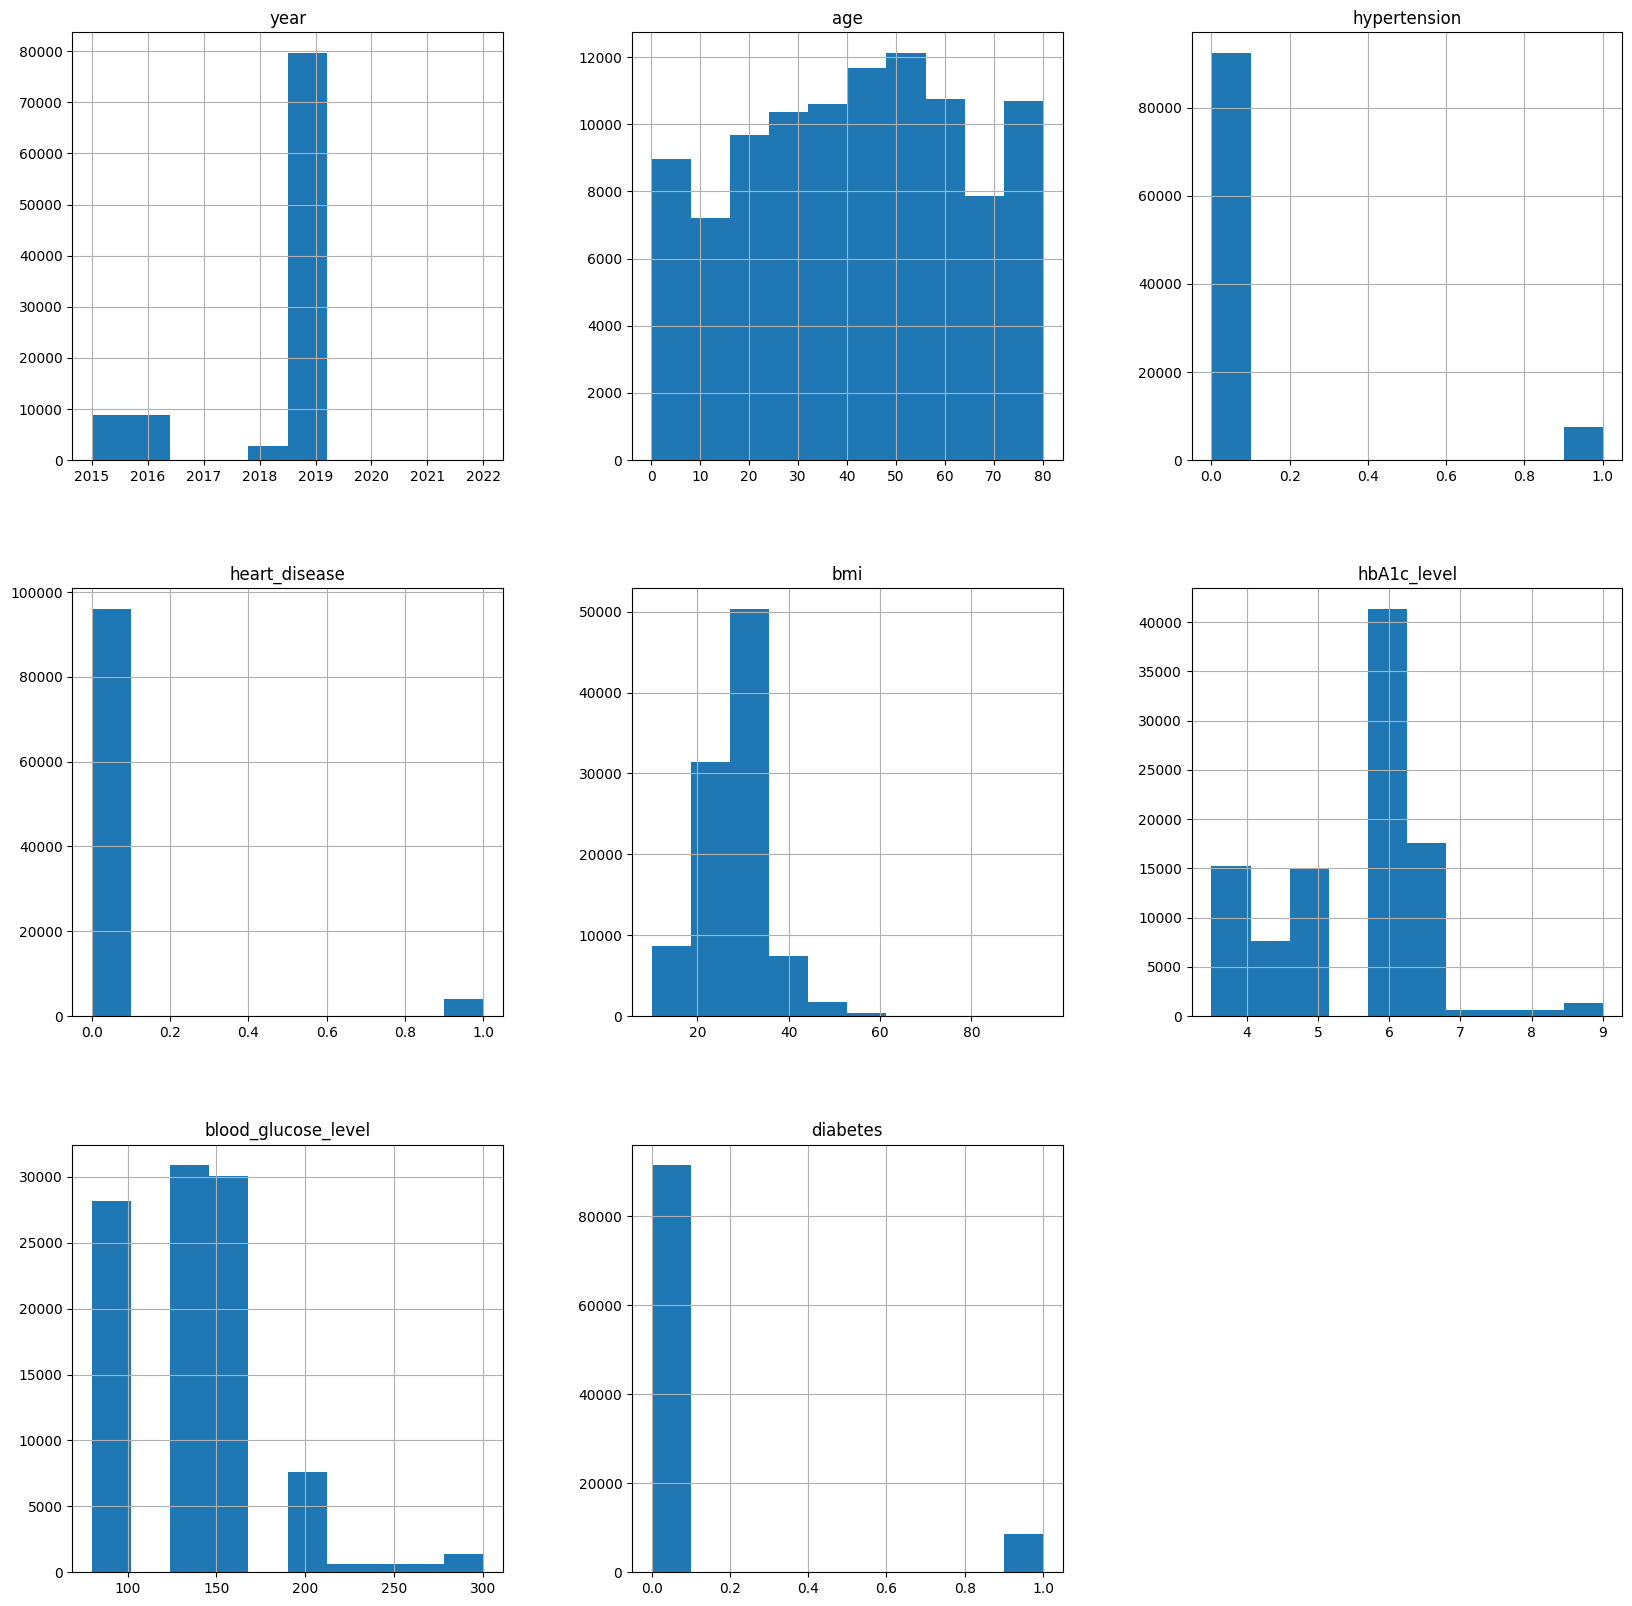

In [18]:
df.hist(figsize=(20,20),bins=10)

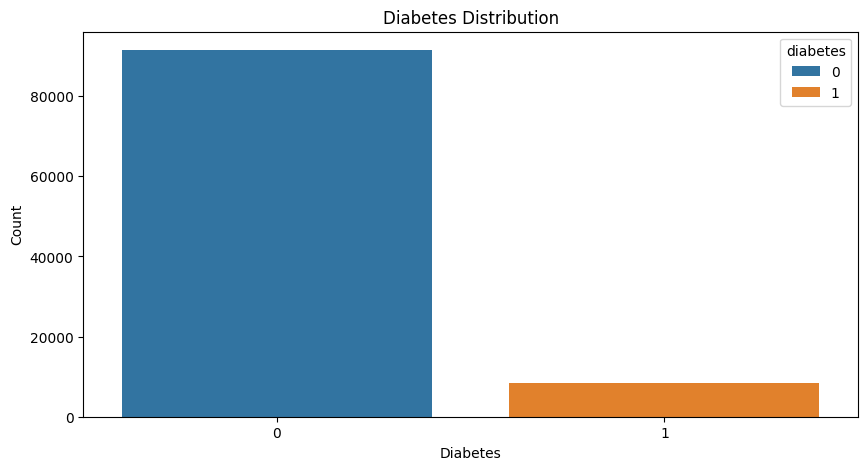

In [19]:
#Checking for Diabetes Distribution
fig = plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='diabetes',hue='diabetes')
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

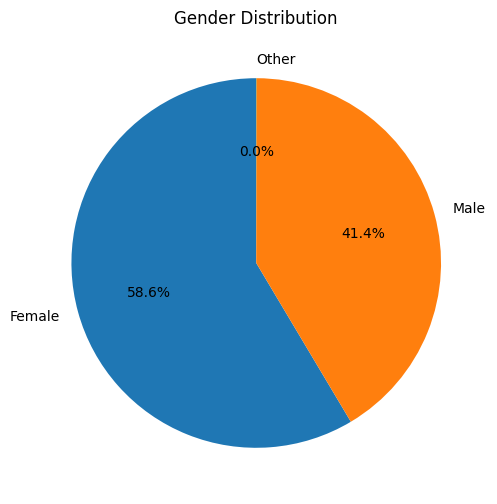

In [20]:
fig=plt.figure(figsize=(10,6))
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%',startangle=90)
plt.title('Gender Distribution')
plt.show()

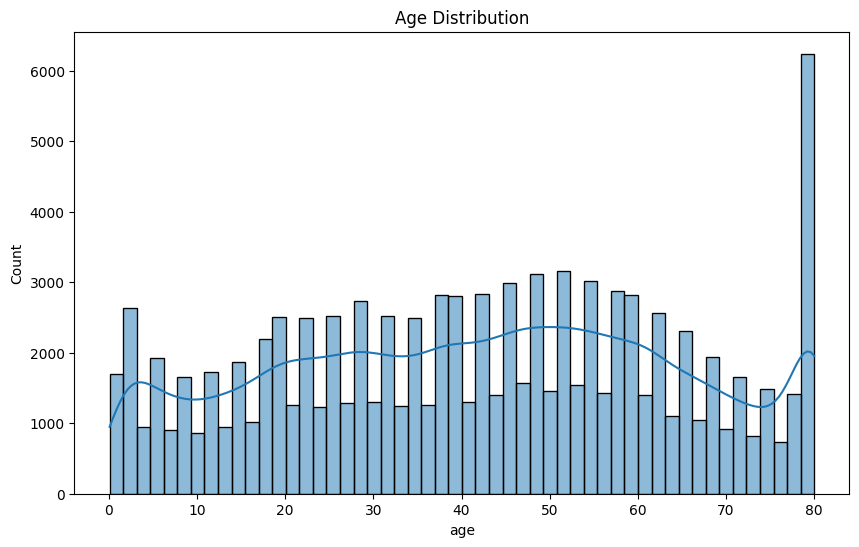

In [21]:
fig=plt.figure(figsize=(10,6))
sns.histplot(df['age'],kde=True)
plt.title('Age Distribution')
plt.show()

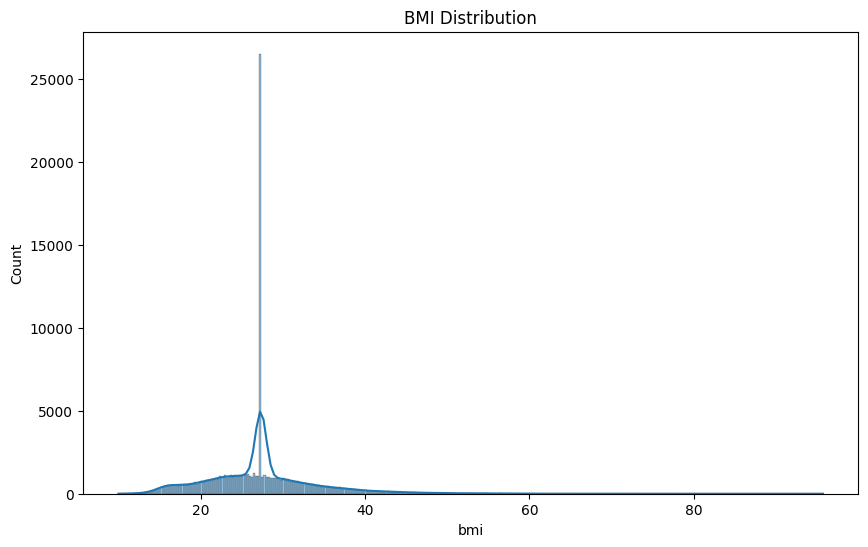

In [22]:
fig=plt.figure(figsize=(10,6))
sns.histplot(df['bmi'],kde=True)
plt.title('BMI Distribution')
plt.show()

#### Correlation of  Features to target

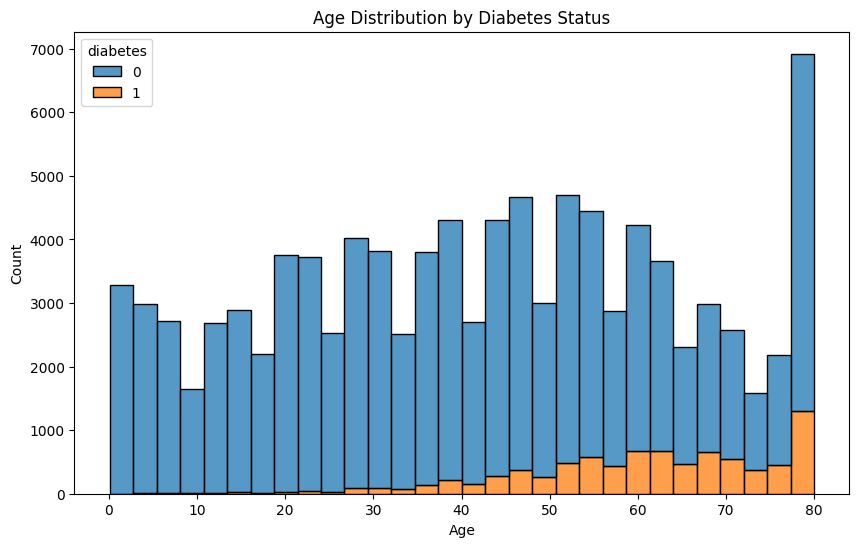

In [23]:
# plot the relationship between age and diabetes in histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='diabetes', multiple='stack', bins=30)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

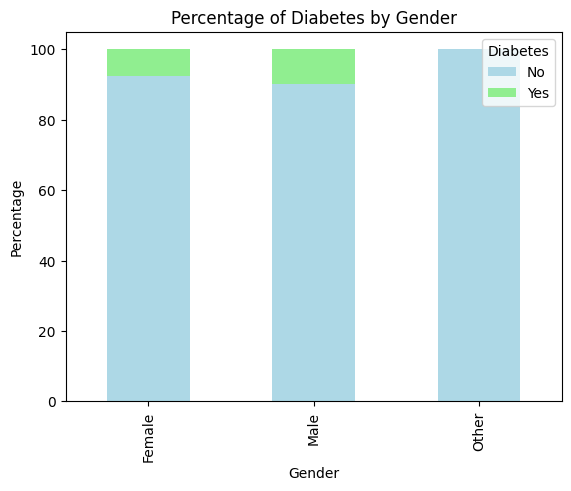

In [24]:
# plot the percent relation between gender and diabetes
# calculate percentage
gender_diabetes = df.groupby(['gender', 'diabetes']).size().unstack()
gender_diabetes_percent =  gender_diabetes.div(gender_diabetes.sum(axis=1), axis=0) * 100
gender_diabetes_percent.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])   
plt.title('Percentage of Diabetes by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Diabetes', labels=['No', 'Yes'])
plt.show()  


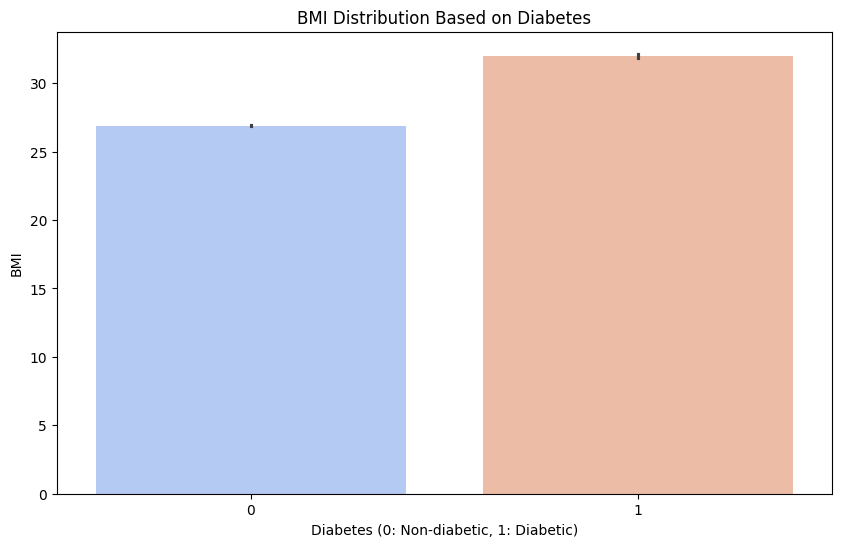

In [25]:
# BMI Distribution Based on Diabetes

plt.figure(figsize=(10, 6))
sns.barplot(x='diabetes', y='bmi', data=df, palette='coolwarm')
plt.title('BMI Distribution Based on Diabetes')
plt.xlabel('Diabetes (0: Non-diabetic, 1: Diabetic)')
plt.ylabel('BMI')
plt.show()

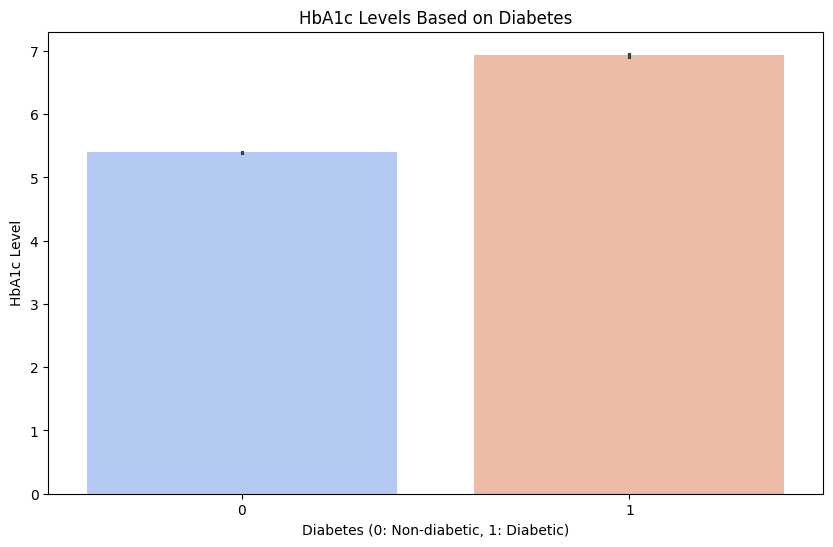

In [26]:
#HbA1c Levels Based on Diabetes

plt.figure(figsize=(10, 6))

sns.barplot(x='diabetes', y='hbA1c_level', data=df, palette='coolwarm')

plt.title('HbA1c Levels Based on Diabetes')

plt.xlabel('Diabetes (0: Non-diabetic, 1: Diabetic)')

plt.ylabel('HbA1c Level')

plt.show()

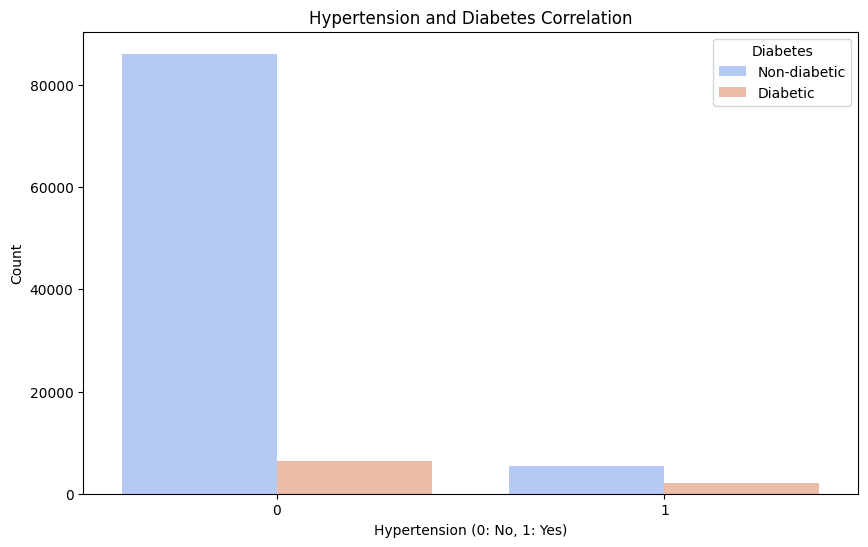

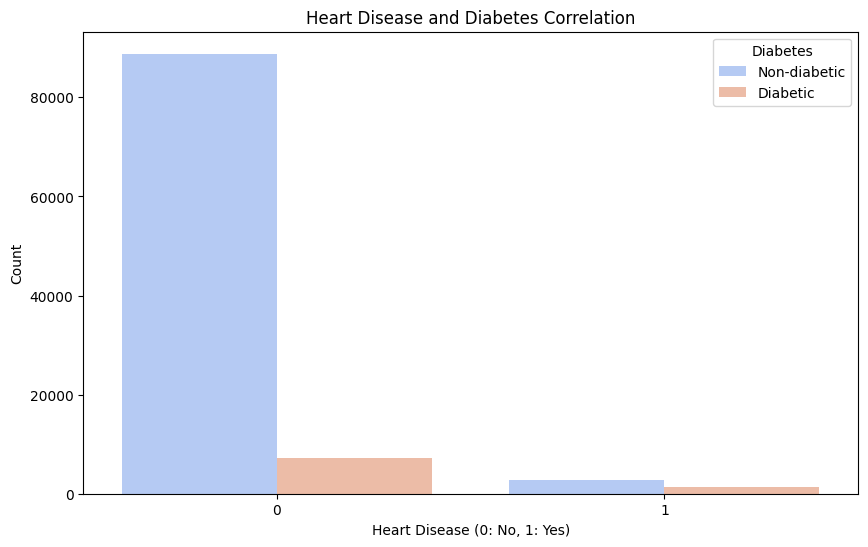

In [27]:
# hyperyension and heart disease correlation with diabetes

plt.figure(figsize=(10, 6))

sns.countplot(x='hypertension', hue='diabetes', data=df, palette='coolwarm')

plt.title('Hypertension and Diabetes Correlation')

plt.xlabel('Hypertension (0: No, 1: Yes)')

plt.ylabel('Count')

plt.legend(title='Diabetes', labels=['Non-diabetic', 'Diabetic'])

plt.show()



plt.figure(figsize=(10, 6))

sns.countplot(x='heart_disease', hue='diabetes', data=df, palette='coolwarm')

plt.title('Heart Disease and Diabetes Correlation')

plt.xlabel('Heart Disease (0: No, 1: Yes)')

plt.ylabel('Count')

plt.legend(title='Diabetes', labels=['Non-diabetic', 'Diabetic'])

plt.show()

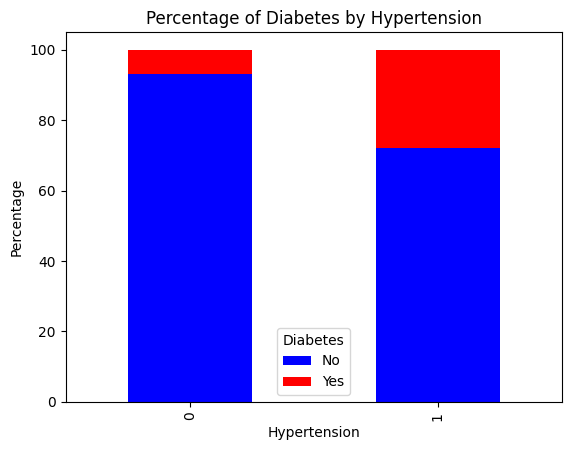

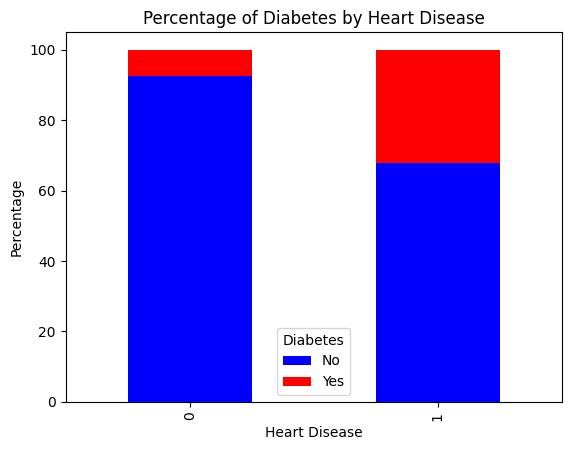

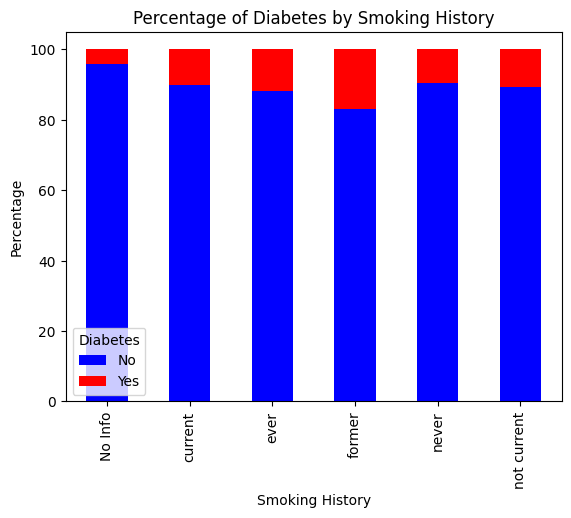

In [28]:
# relation between hypertension, heart disease and smoking history and diabetes based on precentage
conditions = ['hypertension', 'heart_disease', 'smoking_history']   
for condition in conditions:
    condition_diabetes = df.groupby([condition, 'diabetes']).size().unstack()
    condition_diabetes_percent = condition_diabetes.div(condition_diabetes.sum(axis=1), axis=0) * 100
    condition_diabetes_percent.plot(kind='bar', stacked=True, color=['blue', 'red'])
    plt.title(f'Percentage of Diabetes by {condition.replace("_", " ").title()}')
    plt.xlabel(condition.replace("_", " ").title())
    plt.ylabel('Percentage')
    plt.legend(title='Diabetes', labels=['No', 'Yes'])
    plt.show()

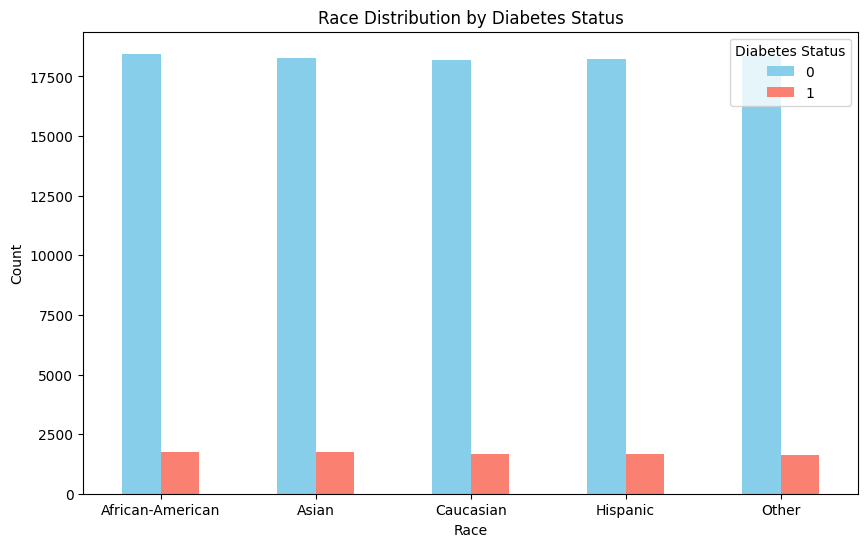

In [29]:
#Race and Diabetes Distribution
race_diabetes = df.groupby(['race', 'diabetes']).size().unstack(fill_value=0)
race_diabetes.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'salmon'])

plt.title('Race Distribution by Diabetes Status')

plt.xlabel('Race')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.legend(title='Diabetes Status')

plt.show()

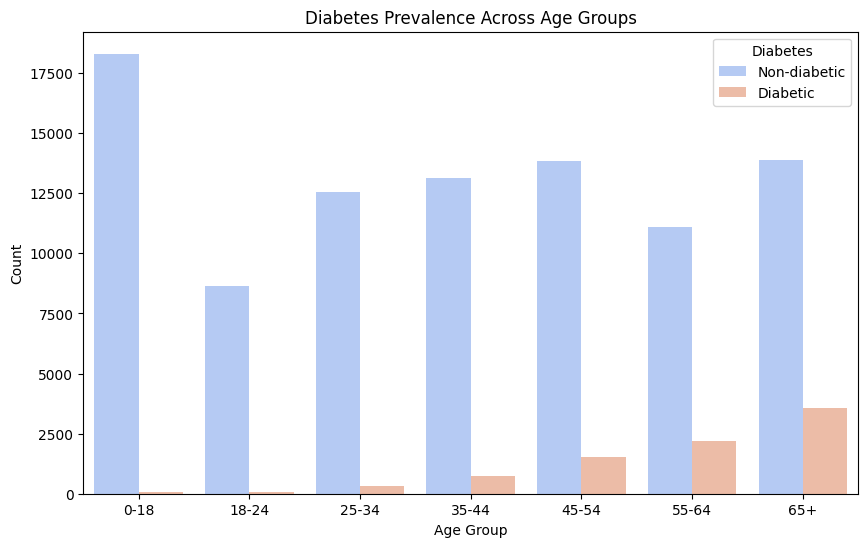

In [30]:
# Diabetes Prevalence Across Age Groups (Bar Plot)

plt.figure(figsize=(10, 6))

sns.countplot(x='age_cat', hue='diabetes', data=df, palette='coolwarm')

plt.title('Diabetes Prevalence Across Age Groups')

plt.xlabel('Age Group')

plt.ylabel('Count')

plt.legend(title='Diabetes', labels=['Non-diabetic', 'Diabetic'])

plt.show()

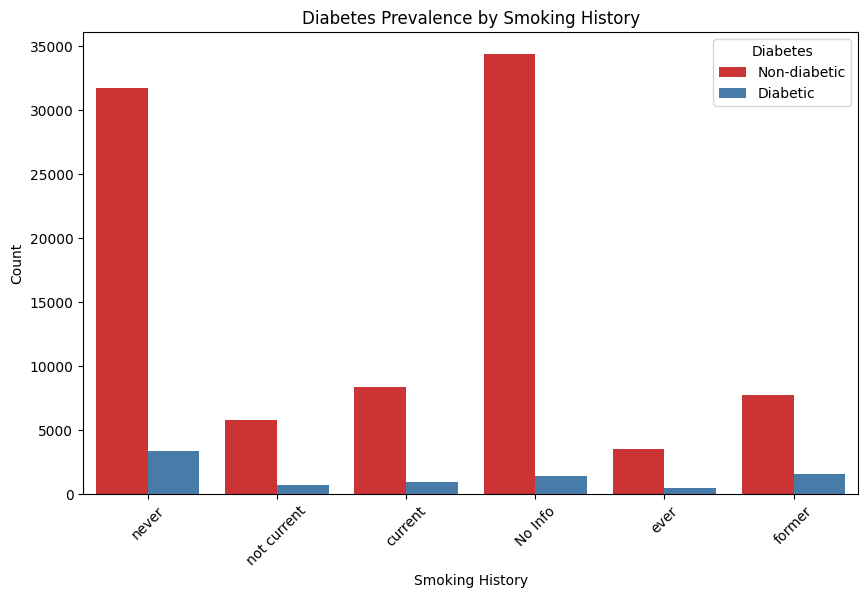

In [31]:
# Bar Plot of Diabetes Prevalence by Smoking History

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_history', hue='diabetes', palette='Set1')
plt.title('Diabetes Prevalence by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.legend(title='Diabetes', labels=['Non-diabetic','Diabetic'])
plt.xticks(rotation=45)
plt.show()

### Preprocessing 

In [32]:
df.drop(columns = ['location','year'], axis = 1,inplace=True)
#df.drop(df[df['smoking_history'] == 'No Info'].index, inplace=True)


In [33]:
#Checking for skewness in the data
df.skew(numeric_only=True)

age                   -0.052027
hypertension           3.231008
heart_disease          4.733497
bmi                    1.043762
hbA1c_level           -0.066833
blood_glucose_level    0.821691
diabetes               2.975943
dtype: float64

#### Removing Outliers

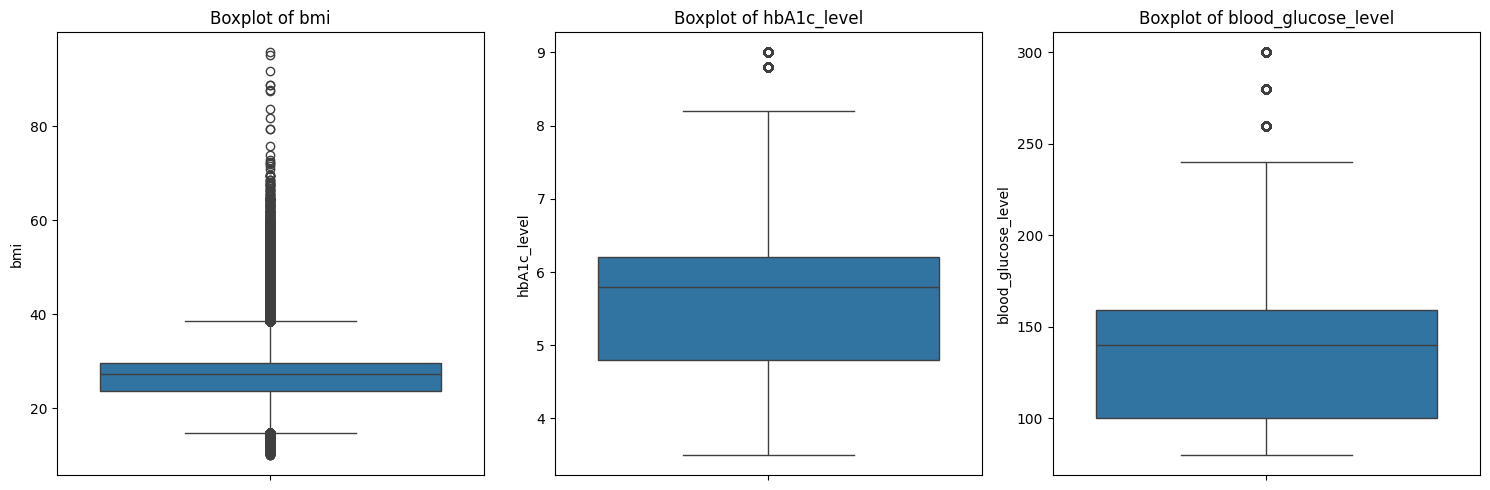

In [34]:
# Checking for outliers to remove them
columns = ['bmi', 'hbA1c_level','blood_glucose_level']
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):

    sns.boxplot(ax=axes[i], y=df[col])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [35]:
# Loop through each column

for col in columns:

    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)

    # IQR calculated for the column
    iqr = percentile75 - percentile25

    # Calculating upper and lower limit
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    # Removing outliers by clipping the values
    df[col] = np.clip(df[col], lower_limit, upper_limit)

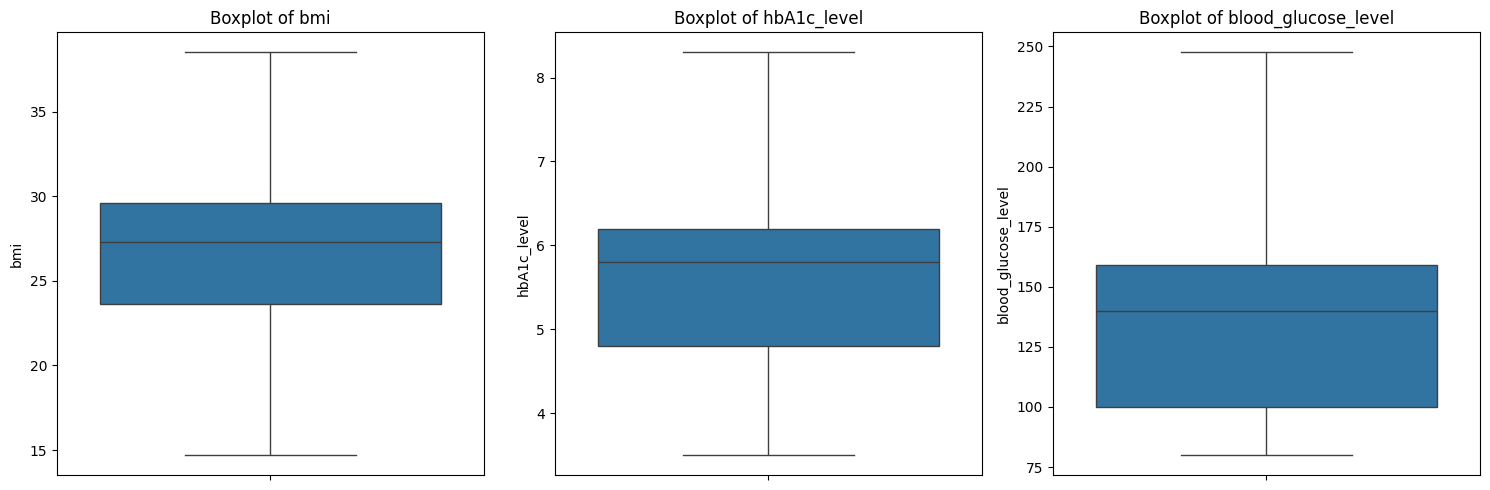

In [36]:
# checking columns boxplots to see them after outliers removal
columns = ['bmi', 'hbA1c_level','blood_glucose_level']
fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))

for i, col in enumerate(columns):

    sns.boxplot(ax=axes[i], y=df[col])
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

#### Correlation with heatmap

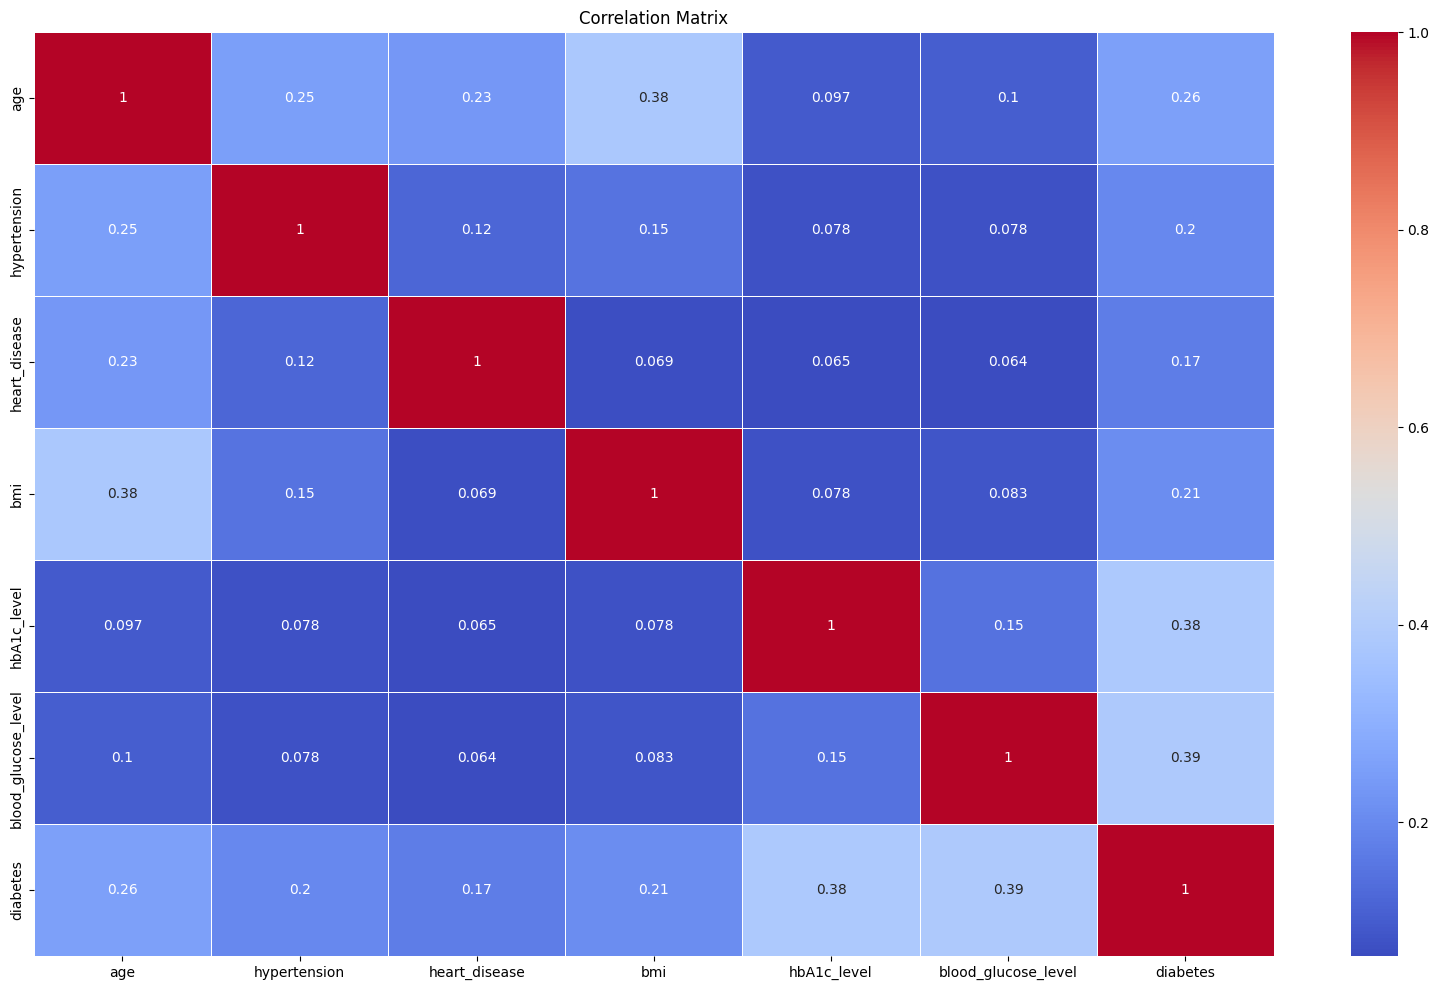

In [37]:
numeric_df=df.select_dtypes(include=[np.number])
fig=plt.figure(figsize=(20,12))
sns.heatmap(numeric_df.corr(),annot=True, cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Label Encoding

In [38]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical columns : " , num_cols)
print("Cetegorical columns : ", cat_cols)

Numerical columns :  ['age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']
Cetegorical columns :  ['gender', 'race', 'smoking_history']


In [39]:
# ===========================
# 1️⃣ Label Encoding برای gender 
# ===========================
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [40]:
# ===========================
# 2️⃣ One-Hot Encoding برای race و smoking_history
# ===========================
categorical_cols = ['race','smoking_history','bmi_cat','age_cat']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99986 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       99986 non-null  int32  
 1   age                          99986 non-null  float64
 2   hypertension                 99986 non-null  int64  
 3   heart_disease                99986 non-null  int64  
 4   bmi                          99986 non-null  float64
 5   hbA1c_level                  99986 non-null  float64
 6   blood_glucose_level          99986 non-null  float64
 7   diabetes                     99986 non-null  int64  
 8   race_Asian                   99986 non-null  bool   
 9   race_Caucasian               99986 non-null  bool   
 10  race_Hispanic                99986 non-null  bool   
 11  race_Other                   99986 non-null  bool   
 12  smoking_history_current      99986 non-null  bool   
 13  smoking_history_ever 

#### Test

In [42]:
X=df.drop('diabetes',axis=1)
y=df['diabetes']

#### Train-Test Split 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Balancing 

In [44]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=42,n_jobs=-1)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)


#rus = RandomUnderSampler(random_state=42)
#X_train_bal, y_train_bal  = rus.fit_resample(X_train, y_train)

#### Scaling data

In [45]:

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_bal), columns=X_train_bal.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)



In [46]:
X_train_scaled.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level',
       'blood_glucose_level', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other', 'smoking_history_current', 'smoking_history_ever',
       'smoking_history_former', 'smoking_history_never',
       'smoking_history_not current', 'bmi_cat_Normal', 'bmi_cat_Overweight',
       'bmi_cat_Moderately Obese', 'bmi_cat_Severely Obese',
       'bmi_cat_Morbidly Obese', 'age_cat_18-24', 'age_cat_25-34',
       'age_cat_35-44', 'age_cat_45-54', 'age_cat_55-64', 'age_cat_65+'],
      dtype='object')

## Clustering


Clustering is an **unsupervised learning technique** that groups similar data points together based on feature similarity.  
It is used when we do **not have labels** and want to discover hidden patterns or natural groupings in the data.

In this notebook, you will perform clustering using:
- **K-Means**
- **Agglomerative (Hierarchical) Clustering**
- **DBSCAN**

and evaluate them using various **clustering metrics**.

---
<font color="#ffcc00">Answer the following question:

- Why might clustering be useful for a medical dataset like the one in this notebook?  
- Can you think of a situation where clustering could fail to find meaningful patterns?


<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

Before applying clustering algorithms, we often perform dimensionality reduction, and one of the most common techniques is **Principal Component Analysis (PCA)**.

### PCA

PCA (Principal Component Analysis) is a linear transformation method that reduces the number of features in a dataset while preserving as much variance as possible.
It works by identifying the directions (called principal components) along which the data varies the most.

####  Why We Use PCA Here
- **Noise reduction:** PCA filters out small variations that might come from noise, helping clustering algorithms to focus on the true structure of the data.

- **Improved visualization:** When we reduce dimensions to 2 or 3 components, we can visualize clusters in a 2D/3D plot.

- **Efficiency:** Many clustering algorithms (like K-Means) work faster and more accurately when data has fewer, informative dimensions.  
- **Better cluster structure:** Helps algorithms detect patterns more clearly.

👉 **Hint:**  
In your code, PCA is applied before clustering, which means you are working with transformed, lower-dimensional data that helps clustering algorithms perform better and visualize results clearly.


In [48]:
## Students Version
## TODO: Reduce the dataset to 2 components using PCA and Visualize the data in a 2D scatter plot, coloring points by Diabetes labels.
# How much of the total variance is explained by the two principal components?

In [49]:
# TA Version

pca_init = PCA(n_components=2, random_state=42)
X_pca_train = pca_init.fit_transform(X_train_scaled)
X_pca_test = pca_init.transform(X_test_scaled)

# Fraction of variance explained by each component
print("Explained variance ratio per component:", pca_init.explained_variance_ratio_)

# Cumulative explained variance
print("Cumulative explained variance:", np.cumsum(pca_init.explained_variance_ratio_))

Explained variance ratio per component: [0.11374785 0.07638497]
Cumulative explained variance: [0.11374785 0.19013282]


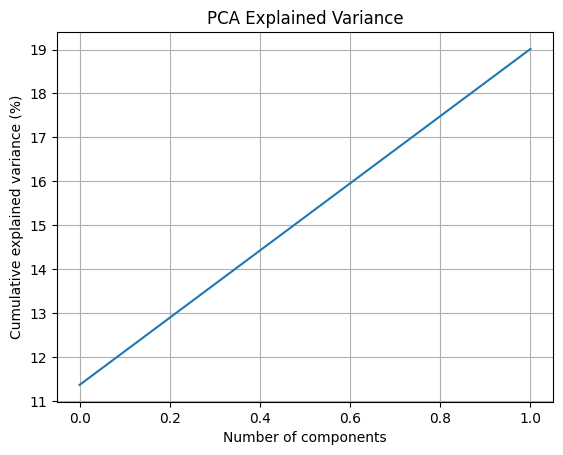

In [50]:

plt.plot(np.cumsum(pca_init.explained_variance_ratio_)*100)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance (%)')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()


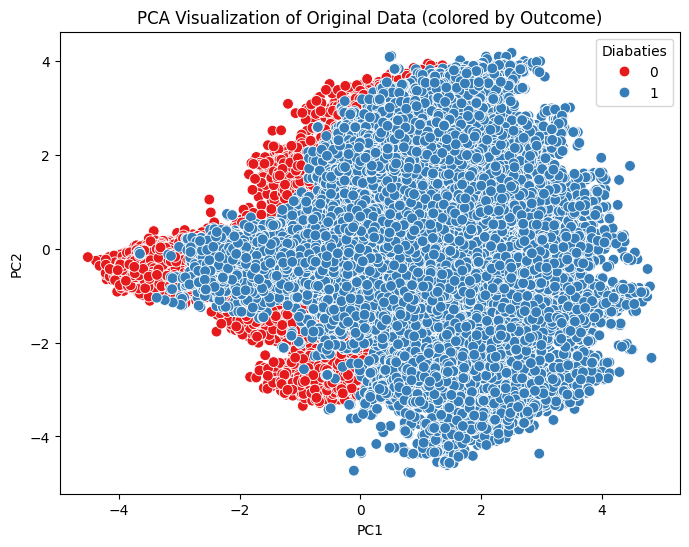

In [51]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_train[:,0], y=X_pca_train[:,1], hue=y_train_bal, palette='Set1', s=60)
plt.title("PCA Visualization of Original Data (colored by Outcome)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title='Diabaties')
plt.show()

---
<font color="#ffcc00">Answer the following question:

- How does reducing the number of dimensions help clustering algorithms?  
- What might happen if you skip PCA and apply clustering directly to high-dimensional data?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

After dimensionality reduction, we can group similar data points into clusters.

Let’s review the most common clustering algorithms you might see in this notebook.

### Clustering Algorithms

#### K-Means


K-Means is a partition-based algorithm that divides data into *k* clusters, minimizing the sum of squared distances between each point and its cluster centroid.

**Steps:**
1. Choose the number of clusters (*k*).  
2. Initialize *k* random centroids.  
3. Assign each point to the nearest centroid.  
4. Recalculate centroids as the mean of assigned points.  
5. Repeat until cluster assignments do not change.

In [52]:
## Students Version
## TODO: Implement K-Means clustering algorithm using the PCA-transformed data and visualize the cluster results in 2D

In [53]:
## TA Version

kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans_train = kmeans.fit_predict(X_pca_train)
clusters_kmeans_test = kmeans.predict(X_pca_test)

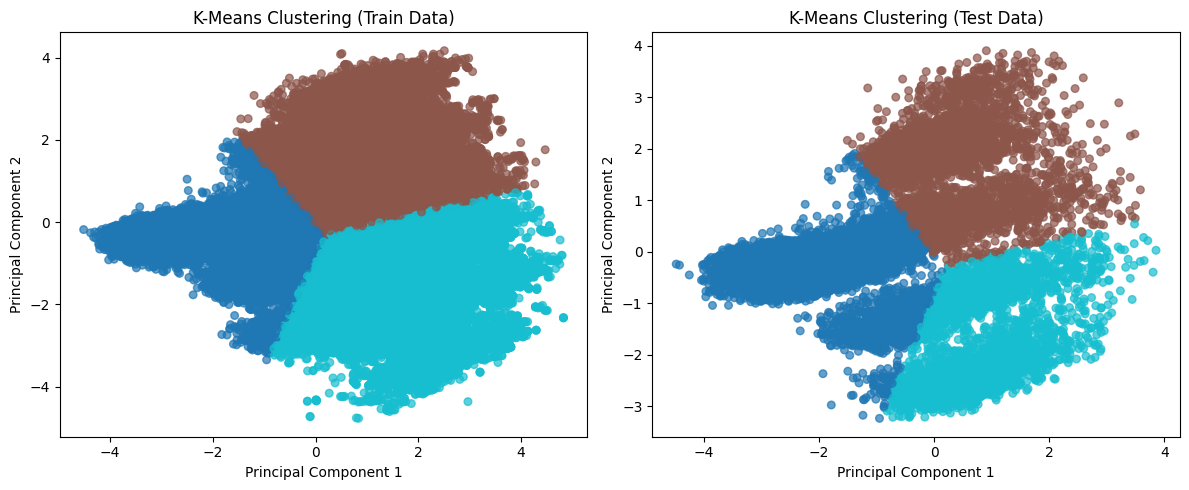

In [54]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)    
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=clusters_kmeans_train, cmap='tab10', s=30,alpha=0.7)
plt.title('K-Means Clustering (Train Data)')
plt.xlabel('Principal Component 1')     
plt.ylabel('Principal Component 2')
plt.subplot(1, 2, 2)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=clusters_kmeans_test, cmap='tab10', s=30,alpha=0.7) 
plt.title('K-Means Clustering (Test Data)')
plt.xlabel('Principal Component 1')     
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()


In [55]:
unique_labels, counts = np.unique(clusters_kmeans_train, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} rows")

Cluster 0: 55146 rows
Cluster 1: 45289 rows
Cluster 2: 35647 rows


---
<font color="#ffcc00">Answer the following question:

- How could you determine the optimal value of *k*?  
- Why is feature scaling important before using K-Means?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### Agglomerative Hierarchical Clustering

Agglomerative clustering follows a **bottom-up** approach.  
Initially, each point is its own cluster, and the algorithm keeps merging the closest clusters until one big cluster remains.
You can visualize this process using a **dendrogram**.


**Two main types:**

- **Agglomerative:**  Start with each point as a cluster, then merge them.

- **Divisive:**  Start with one cluster, then split it.

**Linkage methods:**

- **Single linkage:** uses the minimum distance between clusters.

- **Complete linkage:** uses the maximum distance.

- **Average linkage:** uses the mean distance.

In [372]:
## Students Version
## TODO: Implement Agglomerative Hierarchical Clustering algorithm using the PCA-transformed data and visualize the cluster results in 2D

In [373]:

agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_ahc_train = agglo.fit_predict(X_pca_train)
clusters_ahc_test = agglo.fit_predict(X_pca_test)

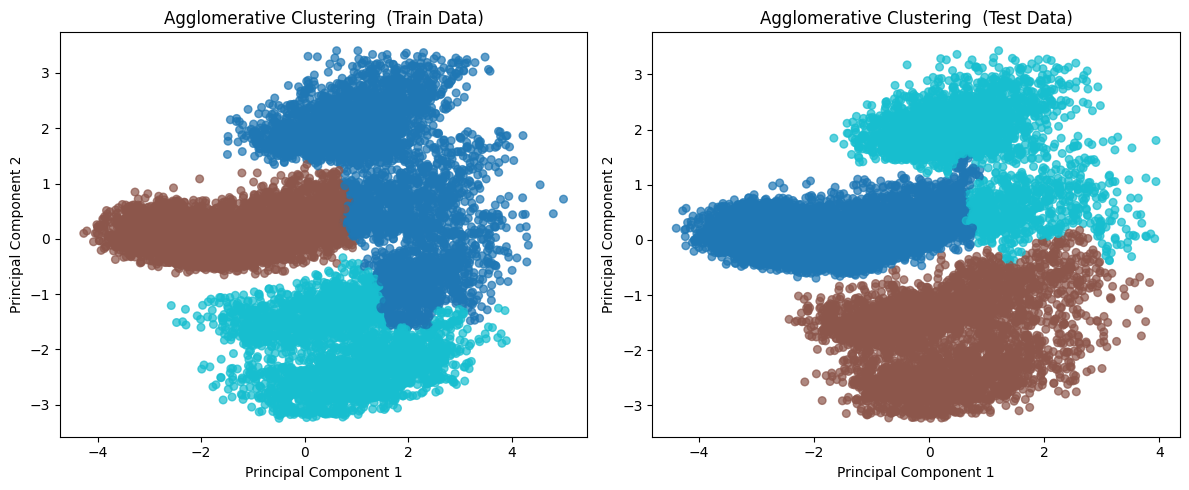

In [374]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)    
plt.scatter(X_pca_train[:, 0], X_pca_train[:, 1], c=clusters_ahc_train, cmap='tab10', s=30,alpha=0.7)
plt.title('Agglomerative Clustering  (Train Data)')
plt.xlabel('Principal Component 1')     
plt.ylabel('Principal Component 2')
plt.subplot(1, 2, 2)
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=clusters_ahc_test, cmap='tab10', s=30,alpha=0.7) 
plt.title('Agglomerative Clustering  (Test Data)')
plt.xlabel('Principal Component 1')     
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()


In [375]:
unique_labels, counts = np.unique(clusters_ahc_train, return_counts=True)
print("Cluster counts:")
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} rows")

Cluster counts:
Cluster 0: 4585 rows
Cluster 1: 5951 rows
Cluster 2: 3064 rows


---
<font color="#ffcc00">Answer the following question:

- How does hierarchical clustering differ from K-Means conceptually?  
- What are “linkage” methods, and how might they affect the final clusters?  


<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### DBSCAN

DBSCAN groups points that are close together (dense regions) and marks isolated points as **outliers**.


**Key Parameters:**
- `eps`: Maximum distance between neighboring points.  
- `min_samples`: Minimum number of neighbors to form a dense region.

In [56]:
## Students Version
## TODO: Implement DBSCAN Clustering algorithm using the PCA-transformed data and visualize the cluster results in 2D

In [57]:
dbscan = DBSCAN(eps=0.2, min_samples=30)  # adjust eps and min_samples
cluster_dbscan_train = dbscan.fit_predict(X_pca_train)
cluster_dbscan_test = dbscan.fit_predict(X_pca_test)

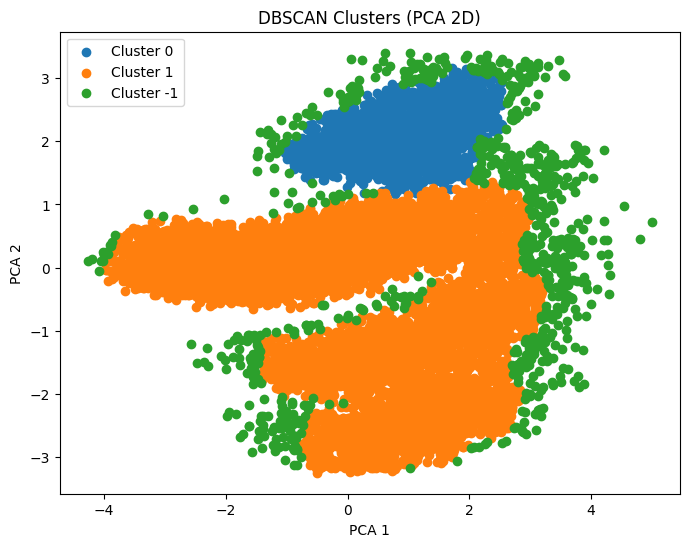

In [58]:
plt.figure(figsize=(8,6))
unique_labels = set(cluster_dbscan_train)
colors = [plt.cm.tab10(i) for i in range(len(unique_labels))]

for k, col in zip(unique_labels, colors):
    class_member_mask = (cluster_dbscan_train == k)
    xy = X_pca_train[class_member_mask]
    

    plt.scatter(xy[:, 0], xy[:, 1], c=[col], label=f'Cluster {k}')

plt.title('DBSCAN Clusters (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [59]:
unique_labels, counts = np.unique(cluster_dbscan_train, return_counts=True)
print("Cluster counts:")
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} rows")

Cluster counts:
Cluster -1: 754 rows
Cluster 0: 2410 rows
Cluster 1: 10436 rows


---
<font color="#ffcc00">Answer the following question:

- Why doesn’t DBSCAN require specifying the number of clusters (*k*)?  
- What happens when `eps` is too small or too large?  
- Why is DBSCAN more robust to outliers than K-Means?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

### Clustering Evaluation Metrics

Since clustering is unsupervised, we don’t have labels to measure accuracy directly.  
However, we can use **internal** or **external** evaluation metrics depending on the situation.


#### Internal Evaluation Metrics 

Internal metrics evaluate the **structure of the clusters** using only the data itself — no true labels are needed.


##### 🧮 1. Silhouette Score

Measures how well a point fits within its own cluster compared to others.
$$
Silhouette = \frac{b - a}{\max(a, b)}
$$

where:  
- `a` = average distance to points in the same cluster  
- `b` = average distance to points in the nearest cluster  

✅ Values close to **+1** mean well-separated clusters.  
⚠️ Values near **0** mean overlapping clusters.  
❌ Negative values mean wrong cluster assignment.

##### 🧮 2. Davies–Bouldin Index (DBI)


Measures the average similarity between each cluster and its most similar one.  
A **lower DBI** indicates better clustering — it rewards clusters that are compact and far apart.


##### 🧮 3. Calinski–Harabasz Index



Also called the *Variance Ratio Criterion*.  
It evaluates the ratio of **between-cluster dispersion** to **within-cluster dispersion**.  
Higher values indicate **better separation** between clusters.

In [380]:
## Student version :

#TODO: Evaluate the performance of ALL 3 above clustering algorithms using Silhouette Score, DBI and Calinski–Harabasz Index
# in both train and test dataset


##### Kmeans Internal Evaluation metrics

In [381]:
# Student version :
# TODO :

In [382]:
# TA Version :
sil_score_kmeans_train = silhouette_score(X_pca_train, clusters_kmeans_train)
ch_score_kmeans_train  = calinski_harabasz_score(X_pca_train, clusters_kmeans_train)
db_score_kmeans_train  = davies_bouldin_score(X_pca_train, clusters_kmeans_train)

print(f"Silhouette Kmeans Train Score: {sil_score_kmeans_train:.3f}")
print(f"Calinski-Harabasz  Kmeans Train Index: {ch_score_kmeans_train:.3f}")
print(f"Davies-Bouldin Kmeans Train Index: {db_score_kmeans_train:.3f}")

Silhouette Kmeans Train Score: 0.503
Calinski-Harabasz  Kmeans Train Index: 16679.654
Davies-Bouldin Kmeans Train Index: 0.718


In [383]:
sil_score_kmeans_test = silhouette_score(X_pca_test, clusters_kmeans_test)
ch_score_kmeans_test = calinski_harabasz_score(X_pca_test, clusters_kmeans_test)
db_score_kmeans_test = davies_bouldin_score(X_pca_test, clusters_kmeans_test)

print(f"Silhouette Kmeans Test  Score: {sil_score_kmeans_test:.3f}")
print(f"Calinski-Harabasz  Kmeans Test Index: {ch_score_kmeans_test:.3f}")
print(f"Davies-Bouldin  Kmeans Test Index: {db_score_kmeans_test:.3f}")

Silhouette Kmeans Test  Score: 0.539
Calinski-Harabasz  Kmeans Test Index: 22013.687
Davies-Bouldin  Kmeans Test Index: 0.639


##### Agglomerative Hierarchical Internal Evaluation metrics

In [384]:
# Student version :
# TODO :

In [385]:
# TA VERSION :

sil_score_ahc_train = silhouette_score(X_pca_train, clusters_ahc_train)
ch_score_ahc_train  = calinski_harabasz_score(X_pca_train, clusters_ahc_train)
db_score_ahc_train  = davies_bouldin_score(X_pca_train, clusters_ahc_train)

print(f"Silhouette Agglomerative Clustering Train Score: {sil_score_ahc_train:.3f}")
print(f"Calinski-Harabasz Agglomerative Clustering Train Index: {ch_score_ahc_train:.3f}")
print(f"Davies-Bouldin Agglomerative Clustering Train Index: {db_score_ahc_train:.3f}")

Silhouette Agglomerative Clustering Train Score: 0.444
Calinski-Harabasz Agglomerative Clustering Train Index: 12256.422
Davies-Bouldin Agglomerative Clustering Train Index: 0.785


In [386]:
sil_score_ahc_test = silhouette_score(X_pca_test, clusters_ahc_test)
ch_score_ahc_test = calinski_harabasz_score(X_pca_test, clusters_ahc_test)
db_score_ahc_test = davies_bouldin_score(X_pca_test, clusters_ahc_test)

print(f"Silhouette Agglomerative Clustering Test  Score: {sil_score_ahc_test:.3f}")
print(f"Calinski-Harabasz Agglomerative Clustering Test Index: {ch_score_ahc_test:.3f}")
print(f"Davies-Bouldin Agglomerative Clustering Test Index: {db_score_ahc_test:.3f}")

Silhouette Agglomerative Clustering Test  Score: 0.525
Calinski-Harabasz Agglomerative Clustering Test Index: 19489.872
Davies-Bouldin Agglomerative Clustering Test Index: 0.697


##### DBSCAN Internal Evaluation metrics

In [387]:
# Student version :
# TODO :

In [388]:
# TA VERSION :

sil_score_dbscan_train = silhouette_score(X_pca_train, cluster_dbscan_train)
ch_score_dbscan_train  = calinski_harabasz_score(X_pca_train, cluster_dbscan_train)
db_score_dbscan_train  = davies_bouldin_score(X_pca_train, cluster_dbscan_train)

print(f"Silhouette dbscan_ Train Score: {sil_score_dbscan_train:.3f}")
print(f"Calinski-Harabasz  dbscan_ Train Index: {ch_score_dbscan_train:.3f}")
print(f"Davies-Bouldin dbscan_ Train Index: {db_score_dbscan_train:.3f}")

Silhouette dbscan_ Train Score: 0.252
Calinski-Harabasz  dbscan_ Train Index: 2405.318
Davies-Bouldin dbscan_ Train Index: 1.997


In [389]:
sil_score_dbscan_test = silhouette_score(X_pca_test, cluster_dbscan_test)
ch_score_dbscan_test = calinski_harabasz_score(X_pca_test, cluster_dbscan_test)
db_score_dbscan_test = davies_bouldin_score(X_pca_test, cluster_dbscan_test)

print(f"Silhouette dbscan Test  Score: {sil_score_dbscan_test:.3f}")
print(f"Calinski-Harabasz  dbscan Test Index: {ch_score_dbscan_test:.3f}")
print(f"Davies-Bouldin  dbscan Test Index: {db_score_dbscan_test:.3f}")

Silhouette dbscan Test  Score: 0.433
Calinski-Harabasz  dbscan Test Index: 8084.930
Davies-Bouldin  dbscan Test Index: 1.523


---
<font color="#ffcc00">Answer the following question:

- Why is Silhouette Score often preferred for visualization-based clustering evaluation?  
- What are the limitations of these internal metrics?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

#### External Evaluation Metrics


When we **have ground-truth labels** (for example, synthetic or labeled datasets), we can evaluate how similar our predicted clusters are to the real labels.


##### 🧮 1. Adjusted Rand Index (ARI)


Compares the similarity between two clusterings (predicted vs. true labels) by counting how many pairs of points are assigned consistently.

- ARI = 1 → Perfect agreement.  
- ARI = 0 → Random labeling.  
- ARI < 0 → Worse than random.

It is “adjusted” for chance, meaning random clustering should give a score near 0.

##### 🧮 2. Normalized Mutual Information (NMI)

Measures the amount of **shared information** between predicted clusters and true labels.  
It is based on the concept of *mutual information* from information theory.

- NMI = 1 → Perfect match.  
- NMI = 0 → No shared information.

In [390]:
## Student version :

#TODO: Evaluate the performance of ALL 3 above clustering algorithms using ARI and NMI in both train and test dataset


##### Kmeans External Evaluation metrics

In [391]:
# Student version :
# TODO :

In [392]:
# TA version :

ari_kmeans_train = adjusted_rand_score(y_train_bal, clusters_kmeans_train)
nmi_kmeans_train = normalized_mutual_info_score(y_train_bal, clusters_kmeans_train)

print(f"Adjusted Rand  Kmeans Train Index: {ari_kmeans_train:.3f}")
print(f"Normalized Mutual Information Kmeans Train : {nmi_kmeans_train:.3f}")

Adjusted Rand  Kmeans Train Index: 0.228
Normalized Mutual Information Kmeans Train : 0.191


In [393]:

ari_kmeans_test = adjusted_rand_score(y_test, clusters_kmeans_test)
nmi_kmeans_test = normalized_mutual_info_score(y_test, clusters_kmeans_test)

print(f"Adjusted Rand  Kmeans Test Index: {ari_kmeans_test:.3f}")
print(f"Normalized Mutual Information  Kmeans Test: {nmi_kmeans_test:.3f}")

Adjusted Rand  Kmeans Test Index: 0.136
Normalized Mutual Information  Kmeans Test: 0.081


##### Agglomerative Hierarchical External Evaluation metrics

In [394]:
# Student version :
# TODO :

In [395]:
# TA version :

ari_ahc_train = adjusted_rand_score(y_train_bal, clusters_ahc_train)
nmi_ahc_train = normalized_mutual_info_score(y_train_bal, clusters_ahc_train)

print(f"Adjusted Rand  Agglomerative Clustering Train Index: {ari_ahc_train:.3f}")
print(f"Normalized Mutual Information Agglomerative Clustering Train : {nmi_kmeans_train:.3f}")

Adjusted Rand  Agglomerative Clustering Train Index: 0.181
Normalized Mutual Information Agglomerative Clustering Train : 0.191


In [396]:

ari_ahc_test = adjusted_rand_score(y_test, clusters_ahc_test)
nmi_ahc_test = normalized_mutual_info_score(y_test, clusters_ahc_test)

print(f"Adjusted Rand Agglomerative Clustering Test Index: {ari_ahc_test:.3f}")
print(f"Normalized Mutual Information Agglomerative Clustering Test: {nmi_ahc_test:.3f}")

Adjusted Rand Agglomerative Clustering Test Index: 0.114
Normalized Mutual Information Agglomerative Clustering Test: 0.058


##### DBSCAN External Evaluation metrics

In [397]:
#Student version :
# TODO :

In [398]:
# TA version :
ari_dbscan_train = adjusted_rand_score(y_train_bal, cluster_dbscan_train)
nmi_dbscan_train = normalized_mutual_info_score(y_train_bal, cluster_dbscan_train)

print(f"Adjusted Rand dbscan Train Index: {ari_dbscan_train:.3f}")
print(f"Normalized Mutual Information dbscan Train : {nmi_dbscan_train:.3f}")

Adjusted Rand dbscan Train Index: 0.022
Normalized Mutual Information dbscan Train : 0.027


In [399]:

ari_dbscan_test = adjusted_rand_score(y_test, cluster_dbscan_test)
nmi_dbscan_test = normalized_mutual_info_score(y_test, cluster_dbscan_test)

print(f"Adjusted Rand dbscan Test Index: {ari_dbscan_test:.3f}")
print(f"Normalized Mutual Information dbscan Test: {nmi_dbscan_test:.3f}")

Adjusted Rand dbscan Test Index: 0.123
Normalized Mutual Information dbscan Test: 0.066


---
<font color="#ffcc00">Answer the following question:

- When would you use external metrics instead of internal ones?  
- Why is it important that external metrics are *label-invariant*?

<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

### Choosing the Number of Clusters

Choosing the right number of clusters (`k`) is a crucial part of clustering, especially for **K-Means**.


#### What is the Elbow Method?

The **Elbow Method** is a visual technique used to determine the optimal number of clusters.

It is based on analyzing the **Within-Cluster Sum of Squares (WCSS)** — the total squared distance between each point and its assigned cluster centroid.

As the number of clusters increases:
- WCSS **decreases** (clusters get smaller and more compact),
- But the **rate of improvement** slows down.

When plotted, WCSS typically forms a **curve with a sharp bend**, resembling an “elbow.”  
The point where the reduction in WCSS starts to slow down is considered the **optimal number of clusters**.



#### How to apply it:
1. Run K-Means for a range of `k` values (e.g., 1 to 10).  
2. Record the WCSS for each `k`.  
3. Plot `k` (x-axis) vs. WCSS (y-axis).  
4. Identify the “elbow point” — where adding more clusters doesn’t significantly reduce WCSS.

In [400]:
# Student version :
# TODO

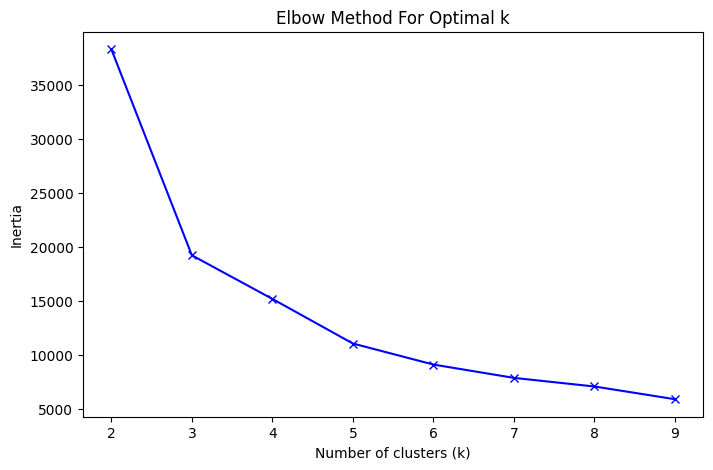

In [401]:
# TA version :

inertia_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_dbscan_train = kmeans.fit_predict(X_pca_train)
    inertia_scores.append(kmeans.inertia_)

# plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(2,10), inertia_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')   
plt.title('Elbow Method For Optimal k')
plt.show()

Number of clusters: 2, Silhouette Score: 0.398
Number of clusters: 3, Silhouette Score: 0.503
Number of clusters: 4, Silhouette Score: 0.470
Number of clusters: 5, Silhouette Score: 0.449
Number of clusters: 6, Silhouette Score: 0.445
Number of clusters: 7, Silhouette Score: 0.424
Number of clusters: 8, Silhouette Score: 0.424
Number of clusters: 9, Silhouette Score: 0.403


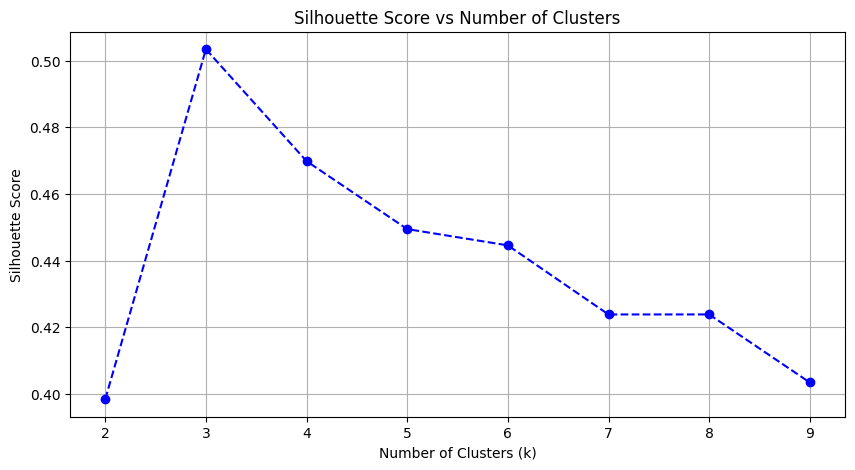

In [402]:

sil_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_dbscan_train = kmeans.fit_predict(X_pca_train)
    score = silhouette_score(X_pca_train, cluster_dbscan_train)
    sil_scores.append(score)
    print(f"Number of clusters: {k}, Silhouette Score: {score:.3f}")

# رسم نمودار
plt.figure(figsize=(10,5))
plt.plot(range(2,10), sil_scores, marker='o', linestyle='--', color='b')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range(2,10))
plt.grid(True)
plt.show()

---
<font color="#ffcc00">Answer the following question:

-  Why does WCSS always decrease as `k` increases?  


<b> <font color='green'>Your Answer:</font></b><br>


</p>
</font>
<hr>

## Classification on Clusters


Evaluating Clusters from: KMeans
Clusters in train: [0 1 2]

[KMeans] XGBoost:
  Accuracy: 94.30%
  Precision: 62.69%
  Recall: 81.53%
  F1 Score: 70.88%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     18298
           1       0.63      0.82      0.71      1700

    accuracy                           0.94     19998
   macro avg       0.80      0.89      0.84     19998
weighted avg       0.95      0.94      0.95     19998

----------------------------------------

[KMeans] RandomForest:
  Accuracy: 93.23%
  Precision: 57.04%
  Recall: 82.47%
  F1 Score: 67.44%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96     18298
           1       0.57      0.82      0.67      1700

    accuracy                           0.93     19998
   macro avg       0.78      0.88      0.82     19998
weighted avg       0.95      0.93      0.94     19998

---

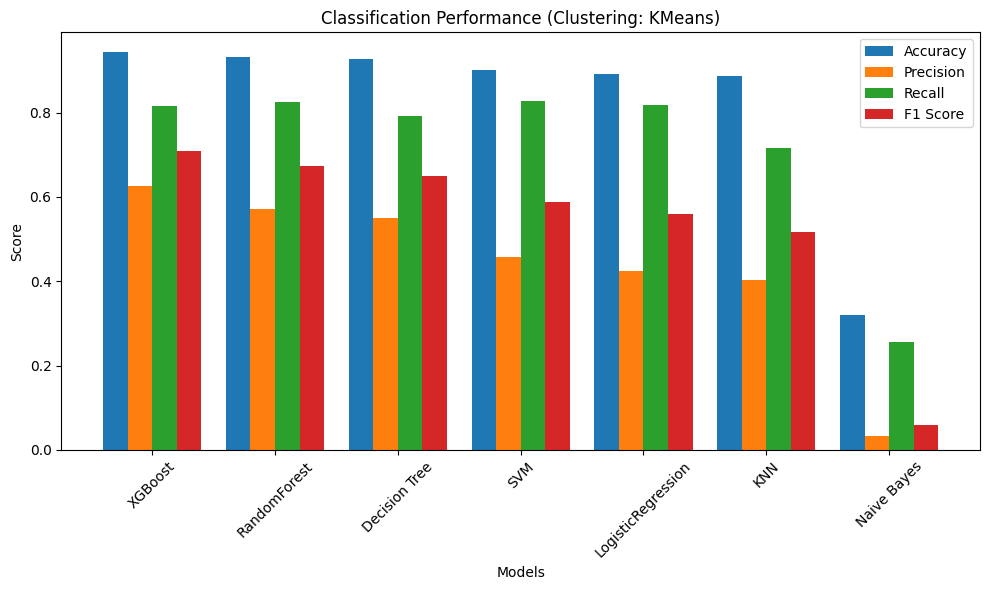

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


models = {
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'RandomForest': RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(probability=True, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
}


clusters_dict = {
    "KMeans": (clusters_kmeans_train, clusters_kmeans_test),
   # "Agglomerative": (clusters_ahc_train, clusters_ahc_test),
   # "DBSCAN": (cluster_dbscan_train, cluster_dbscan_test),

}


all_overall_df = []  

for cluster_method, (clusters_train, clusters_test) in clusters_dict.items():
    print(f"\n{'='*20}\nEvaluating Clusters from: {cluster_method}\n{'='*20}")

    results = []
    overall_predictions = {name: [] for name in models.keys()}
    overall_true = []

    unique_clusters = np.unique(clusters_train)
    print("Clusters in train:", unique_clusters)

    for cluster in unique_clusters:
        if cluster == -1:  
            continue

        X_cluster_train = X_train_scaled[clusters_train == cluster]
        y_cluster_train = y_train_bal[clusters_train == cluster]
        X_cluster_test = X_test_scaled[clusters_test == cluster]
        y_cluster_test = y_test[clusters_test == cluster]

        if len(np.unique(y_cluster_train)) < 2:
            print("Skipping this cluster due to lack of class variety.")
            continue

        #if len(y_cluster_test) == 0 or len(y_cluster_train) < 5:
       #     print(f"Cluster {cluster} skipped (too few samples).")
      #      continue

        overall_true.extend(y_cluster_test)

        for model_name, model in models.items():
            model.fit(X_cluster_train, y_cluster_train)
            y_pred_test = model.predict(X_cluster_test)
            overall_predictions[model_name].extend(y_pred_test)

            acc = accuracy_score(y_cluster_test, y_pred_test)
            prec = precision_score(y_cluster_test, y_pred_test, zero_division=0)
            rec = recall_score(y_cluster_test, y_pred_test, zero_division=0)
            f1 = f1_score(y_cluster_test, y_pred_test, zero_division=0)

            results.append({
                'Cluster Method': cluster_method,
                'Cluster': cluster,
                'Model': model_name,
                'Test Accuracy': acc,
                'Test Precision': prec,
                'Test Recall': rec,
                'Test F1': f1,
                'Train Samples': len(y_cluster_train),
                'Test Samples': len(y_cluster_test)
            })


    overall_scores = []
    y_true_all = np.array(overall_true)

    for model_name in models.keys():
        y_pred_all = np.array(overall_predictions[model_name])

        if len(y_pred_all) != len(y_true_all):
            print(f"⚠️ Warning: {model_name} has {len(y_pred_all)} predictions vs {len(y_true_all)} true labels.")
            continue

        acc = accuracy_score(y_true_all, y_pred_all)
        prec = precision_score(y_true_all, y_pred_all, zero_division=0)
        rec = recall_score(y_true_all, y_pred_all, zero_division=0)
        f1 = f1_score(y_true_all, y_pred_all, zero_division=0)

        print(f"\n[{cluster_method}] {model_name}:")
        print(f"  Accuracy: {acc * 100:.2f}%")
        print(f"  Precision: {prec * 100:.2f}%")
        print(f"  Recall: {rec * 100:.2f}%")
        print(f"  F1 Score: {f1 * 100:.2f}%")
        print(f"Classification Report:\n {classification_report(y_true_all, y_pred_all)}")
        print("-" * 40)

        overall_scores.append({
            'Cluster Method': cluster_method,
            'Model': model_name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1': f1
        })

   
    overall_df = pd.DataFrame(overall_scores)
    overall_df = overall_df.sort_values(by="F1", ascending=False)
    all_overall_df.append(overall_df)

   
    plt.figure(figsize=(10, 6))
    bar_width = 0.2
    x = range(len(overall_df))

    plt.bar(x, overall_df["Accuracy"], width=bar_width, label='Accuracy')
    plt.bar([p + bar_width for p in x], overall_df["Precision"], width=bar_width, label='Precision')
    plt.bar([p + 2 * bar_width for p in x], overall_df["Recall"], width=bar_width, label='Recall')
    plt.bar([p + 3 * bar_width for p in x], overall_df["F1"], width=bar_width, label='F1 Score')

    plt.xticks([p + 1.5 * bar_width for p in x], overall_df["Model"], rotation=45)
    plt.xlabel("Models")
    plt.ylabel("Score")
    plt.title(f"Classification Performance (Clustering: {cluster_method})")
    plt.legend()
    plt.tight_layout()
    plt.show()

final_results = pd.concat(all_overall_df, ignore_index=True)


## Pure Classification

XGBoost:
  Accuracy: 89.94%
  Precision: 45.46%
  Recall: 91.53%
  F1 Score: 60.75%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     18298
           1       0.45      0.92      0.61      1700

    accuracy                           0.90     19998
   macro avg       0.72      0.91      0.77     19998
weighted avg       0.95      0.90      0.91     19998

----------------------------------------
RandomForest:
  Accuracy: 89.84%
  Precision: 45.17%
  Recall: 90.94%
  F1 Score: 60.36%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94     18298
           1       0.45      0.91      0.60      1700

    accuracy                           0.90     19998
   macro avg       0.72      0.90      0.77     19998
weighted avg       0.94      0.90      0.91     19998

----------------------------------------
KNN:
  Accuracy: 81.13%
  Precision: 28.76%

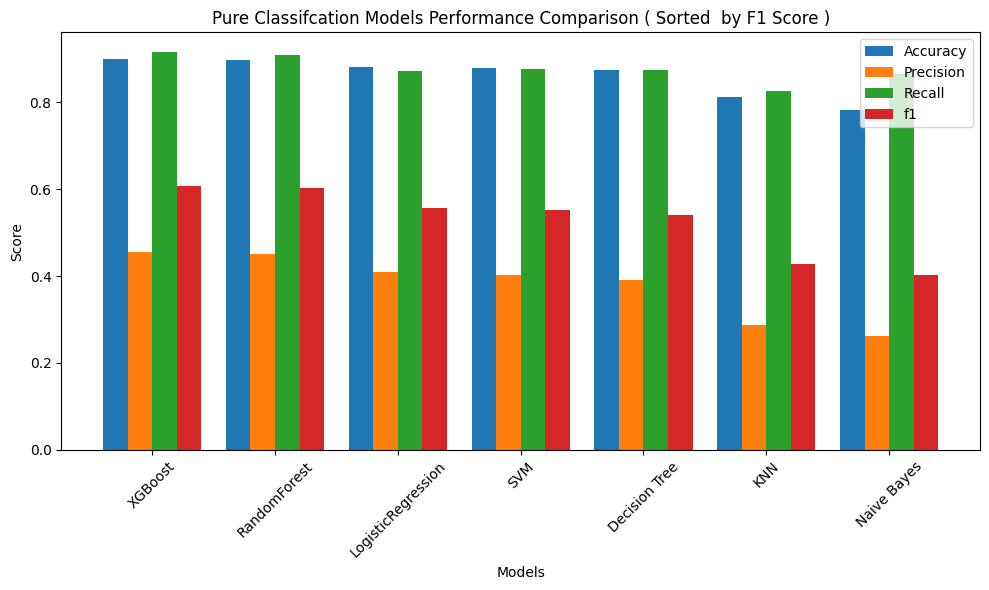

In [404]:

models = {
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'RandomForest': RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(probability=True, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
}



results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train_bal)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the results in a formatted way

    print(f"{name}:")
    print(f"  Accuracy: {accuracy * 100:.2f}%")
    print(f"  Precision: {precision * 100:.2f}%")
    print(f"  Recall: {recall * 100:.2f}%")
    print(f"  F1 Score: {f1 * 100:.2f}%")
    print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
    print("-" * 40)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "f1" : f1
    })


results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="f1", ascending=False)


plt.figure(figsize=(10,6))
bar_width = 0.2
x = range(len(results_df))

plt.bar(x, results_df["Accuracy"], width=bar_width, label='Accuracy')
plt.bar([p + bar_width for p in x], results_df["Precision"], width=bar_width, label='Precision')
plt.bar([p + 2*bar_width for p in x], results_df["Recall"], width=bar_width, label='Recall')
plt.bar([p + 3*bar_width for p in x], results_df["f1"], width=bar_width, label='f1')

plt.xticks([p + 1.5*bar_width for p in x], results_df["Model"], rotation=45)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Pure Classifcation Models Performance Comparison ( Sorted  by F1 Score )")
plt.legend()
plt.tight_layout()
plt.show()


## Hyperparameter tuning

### GridSearchCV

In [160]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'gamma': [0, 0.2, 0.5],
    'scale_pos_weight': [1, 3, 5]
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train_bal)

print("Best Params (GridSearch):", grid_search.best_params_)
print("Best Recall (CV):", grid_search.best_score_)


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Params (GridSearch): {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'scale_pos_weight': 5, 'subsample': 0.9}
Best Recall (CV): 0.7489027391641219


In [161]:
best_model = grid_search.best_estimator_  
y_pred = best_model.predict(X_test_scaled)

print("\n📊 Final Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


📊 Final Evaluation on Test Set:
Accuracy: 0.9339110644257703
Precision: 0.4936823104693141
Recall: 0.738191632928475
F1 Score: 0.5916711736073553

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96     10683
           1       0.49      0.74      0.59       741

    accuracy                           0.93     11424
   macro avg       0.74      0.84      0.78     11424
weighted avg       0.95      0.93      0.94     11424



### RandomizedSearchCV

In [162]:
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.5),
    'scale_pos_weight': randint(1, 10)
}

xgb_model =  xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    scoring='f1',
    n_iter=50,      
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train_scaled, y_train_bal)

print("Best Params (RandomizedSearch):", random_search.best_params_)
print("Best Recall (CV):", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Params (RandomizedSearch): {'colsample_bytree': 0.6943939678995823, 'gamma': 0.12803416138066198, 'learning_rate': 0.022130076861529402, 'max_depth': 9, 'n_estimators': 114, 'scale_pos_weight': 3, 'subsample': 0.6125716742746937}
Best Recall (CV): 0.6562495583354828


In [163]:
best_model = random_search.best_estimator_  
y_pred = best_model.predict(X_test_scaled)

print("\n📊 Final Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



📊 Final Evaluation on Test Set:
Accuracy: 0.9576330532212886
Precision: 0.7159663865546219
Recall: 0.5748987854251012
F1 Score: 0.6377245508982036

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     10683
           1       0.72      0.57      0.64       741

    accuracy                           0.96     11424
   macro avg       0.84      0.78      0.81     11424
weighted avg       0.95      0.96      0.96     11424



### Bayesian Optimization

In [164]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

search_spaces = {
    'n_estimators': Integer(100, 400),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'gamma': Real(0.0, 0.5),
    'scale_pos_weight': Integer(1, 10)
}

opt_search = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=search_spaces,
    n_iter=20,        
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

opt_search.fit(X_train_scaled, y_train_bal)

print("Best Params (Bayesian):", opt_search.best_params_)
print("Best Recall (CV):", opt_search.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [165]:
best_model = opt_search.best_estimator_  
y_pred = best_model.predict(X_test_scaled)

print("\n📊 Final Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



📊 Final Evaluation on Test Set:
Accuracy: 0.9648109243697479
Precision: 0.9721448467966574
Recall: 0.4709851551956815
F1 Score: 0.6345454545454545

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     10683
           1       0.97      0.47      0.63       741

    accuracy                           0.96     11424
   macro avg       0.97      0.74      0.81     11424
weighted avg       0.97      0.96      0.96     11424

